In [1]:
# packages
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import re
from tqdm.notebook import tqdm
import unidecode
from collections import Counter
from shapely.geometry import Point, LineString, Polygon

In [7]:
# directories
INDIR = "../../input"
OUTDIR = "../../output"
DATADIR = "../../../../data"
FILE_cities = "List_of_cities_300k.csv"

## Load File

In [15]:
# load list of cities
list_of_cities = pd.read_csv(os.path.join(INDIR, FILE_cities), sep=';')
cities = [unidecode.unidecode(city) for city in list_of_cities.Mua_en]
df_cities = pd.DataFrame(cities, columns = ["city"])

In [3]:
# load file
file_name = "gravity_df_DUM.csv"
fp = os.path.join(OUTDIR, file_name)
df = pd.read_csv(fp, sep=';')

In [4]:
df.head()

,city_A,city_B,POP_A,POP_B,distance,border_DUM,FR_DUM,FR_int,EN_DUM,EN_int,col_en,col_fr,col_prop_fr,col_prop_en,fr_en_prop,en_fr_prop
0,Paris,London,9591,8256,342.719841,1,1,0,1,0,21874.0,10733.0,1.787238,2.095814,0.852766,1.172655
1,Paris,Madrid,9591,4955,1047.105521,1,1,0,0,0,3394.0,2404.0,0.400309,0.325189,1.231004,0.812345
2,Paris,Berlin,9591,3776,879.835916,1,1,0,0,0,7899.0,4723.0,0.786465,0.756827,1.039161,0.962315
3,Paris,Milan,9591,3698,640.685161,1,1,0,0,0,3342.0,2713.0,0.451763,0.320207,1.410848,0.708794
4,Paris,Barcelona,9591,3659,827.813778,1,1,0,0,0,2397.0,1696.0,0.282415,0.229664,1.229687,0.813215


## Spread of the difference

In [5]:
df['fr_en_prop'].std()

1.9933299999231386

<AxesSubplot:ylabel='Frequency'>

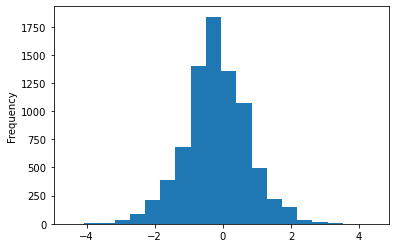

In [6]:
# distribution of the difference (log transform because proportions so .1-1-10 should be the same distance.)
# negative values french smaller than english, positive values english larger than french.
logged = np.log(df.fr_en_prop)
logged.plot.hist(bins=20)

## Centrality

In [35]:
en_degrees = dict()

for city in cities: 
    en_degrees[city] = 0

In [36]:
en_degrees

{'Paris': 0,
 'London': 0,
 'Madrid': 0,
 'Berlin': 0,
 'Milan': 0,
 'Barcelona': 0,
 'Athens': 0,
 'Rome': 0,
 'Birmingham': 0,
 'Lisbon': 0,
 'Naples': 0,
 'Katowice': 0,
 'Manchester': 0,
 'Hamburg': 0,
 'Budapest': 0,
 'Bucharest': 0,
 'Warsaw': 0,
 'Stuttgart': 0,
 'Vienna': 0,
 'Munich': 0,
 'Brussels': 0,
 'Stockholm': 0,
 'Frankfurt': 0,
 'Cologne': 0,
 'Copenhagen': 0,
 'Valencia': 0,
 'Turin': 0,
 'Glasgow': 0,
 'Prague': 0,
 'Lyon': 0,
 'Sofia': 0,
 'Liverpool': 0,
 'Porto': 0,
 'Seville': 0,
 'Dublin': 0,
 'Helsinki': 0,
 'Amsterdam': 0,
 'Rotterdam': 0,
 'Dusseldorf': 0,
 'Essen-Oberhausen': 0,
 'Lille': 0,
 'Lodz': 0,
 'Marseille': 0,
 'Antwerp': 0,
 'Bilbao': 0,
 'Newcastle': 0,
 'Krakow': 0,
 'Bochum-Herne': 0,
 'Thessaloniki': 0,
 'Nuremberg': 0,
 'Riga': 0,
 'Duisburg': 0,
 'Dortmund': 0,
 'Hanover': 0,
 'Zurich': 0,
 'Oslo': 0,
 'Bremen': 0,
 'Dresden': 0,
 'Sheffield': 0,
 'Palermo': 0,
 'Poznan': 0,
 'Gelsenkirchen-Bottrop': 0,
 'Bordeaux': 0,
 'Wroclaw': 0,
 'Goth

In [37]:
fr_degrees = en_degrees.copy()

In [39]:
for i, row in df.iterrows():
    en_degrees[row.city_A] += row.col_en
    en_degrees[row.city_B] += row.col_en
    fr_degrees[row.city_A] += row.col_fr
    fr_degrees[row.city_B] += row.col_fr

In [31]:
row.city_A

'Paris'

In [42]:
fr_degrees

{'Paris': 143164.0,
 'London': 49252.0,
 'Madrid': 22622.0,
 'Berlin': 38232.0,
 'Milan': 26288.0,
 'Barcelona': 18818.0,
 'Athens': 6948.0,
 'Rome': 41234.0,
 'Birmingham': 3599.0,
 'Lisbon': 7159.0,
 'Naples': 14222.0,
 'Katowice': 720.0,
 'Manchester': 8967.0,
 'Hamburg': 12352.0,
 'Budapest': 6919.0,
 'Bucharest': 4476.0,
 'Warsaw': 9047.0,
 'Stuttgart': 6786.0,
 'Vienna': 30029.0,
 'Munich': 21052.0,
 'Brussels': 29123.0,
 'Stockholm': 7731.0,
 'Frankfurt': 11468.0,
 'Cologne': 10712.0,
 'Copenhagen': 5546.0,
 'Valencia': 9264.0,
 'Turin': 11092.0,
 'Glasgow': 4192.0,
 'Prague': 12311.0,
 'Lyon': 41876.0,
 'Sofia': 3058.0,
 'Liverpool': 6478.0,
 'Porto': 4360.0,
 'Seville': 6493.0,
 'Dublin': 4103.0,
 'Helsinki': 3875.0,
 'Amsterdam': 15898.0,
 'Rotterdam': 5337.0,
 'Dusseldorf': 5485.0,
 'Essen-Oberhausen': 2226.0,
 'Lille': 19111.0,
 'Lodz': 1562.0,
 'Marseille': 32188.0,
 'Antwerp': 11101.0,
 'Bilbao': 2746.0,
 'Newcastle': 2526.0,
 'Krakow': 3859.0,
 'Bochum-Herne': 1100.0,
 '

In [43]:
en_degrees

{'Paris': 133290.0,
 'London': 186442.0,
 'Madrid': 40174.0,
 'Berlin': 86859.0,
 'Milan': 40713.0,
 'Barcelona': 32262.0,
 'Athens': 14854.0,
 'Rome': 59834.0,
 'Birmingham': 33449.0,
 'Lisbon': 12518.0,
 'Naples': 20233.0,
 'Katowice': 2357.0,
 'Manchester': 58871.0,
 'Hamburg': 29815.0,
 'Budapest': 15500.0,
 'Bucharest': 10256.0,
 'Warsaw': 21961.0,
 'Stuttgart': 15628.0,
 'Vienna': 54409.0,
 'Munich': 44470.0,
 'Brussels': 29138.0,
 'Stockholm': 18521.0,
 'Frankfurt': 27835.0,
 'Cologne': 21033.0,
 'Copenhagen': 16470.0,
 'Valencia': 11291.0,
 'Turin': 13031.0,
 'Glasgow': 28750.0,
 'Prague': 24192.0,
 'Lyon': 15559.0,
 'Sofia': 9249.0,
 'Liverpool': 42268.0,
 'Porto': 6427.0,
 'Seville': 7323.0,
 'Dublin': 22008.0,
 'Helsinki': 8652.0,
 'Amsterdam': 31840.0,
 'Rotterdam': 11222.0,
 'Dusseldorf': 11995.0,
 'Essen-Oberhausen': 6670.0,
 'Lille': 6742.0,
 'Lodz': 4360.0,
 'Marseille': 11341.0,
 'Antwerp': 12607.0,
 'Bilbao': 5385.0,
 'Newcastle': 22091.0,
 'Krakow': 9431.0,
 'Bochum-

In [48]:
df_cities['en_degree'] = en_degrees.values()

In [50]:
df_cities['fr_degree'] = fr_degrees.values()

In [59]:
df_cities.sort_values('en_degree', ascending=False).head(10)

,city,en_degree,fr_degree
1,London,186442.0,49252.0
0,Paris,133290.0,143164.0
3,Berlin,86859.0,38232.0
7,Rome,59834.0,41234.0
12,Manchester,58871.0,8967.0
18,Vienna,54409.0,30029.0
19,Munich,44470.0,21052.0
31,Liverpool,42268.0,6478.0
4,Milan,40713.0,26288.0
2,Madrid,40174.0,22622.0


In [63]:
en_degrees = dict()

for city in cities: 
    en_degrees[city] = 0

In [64]:
fr_degrees = en_degrees.copy()

In [65]:
for i, row in df.iterrows():
    en_degrees[row.city_A] += row.col_prop_en
    en_degrees[row.city_B] += row.col_prop_en
    fr_degrees[row.city_A] += row.col_prop_fr
    fr_degrees[row.city_B] += row.col_prop_fr

In [67]:
df_cities['en_degree_prop'] = en_degrees.values()

In [68]:
df_cities['fr_degree_prop'] = fr_degrees.values()

In [75]:
df_cities.sort_values('en_degree_prop', ascending=True).head(15)

,city,en_degree,fr_degree,en_degree_prop,fr_degree_prop
150,Gdynia,0.0,0.0,0.000000,0.000000
137,Busto Arsizio,89.0,61.0,0.008527,0.010158
120,Castellammare di Stabia-Torre Annunziata,203.0,146.0,0.019450,0.024312
122,Santa Cruz de Tenerife,577.0,180.0,0.055284,0.029973
142,A Coruna,684.0,1166.0,0.065536,0.194160
144,Caserta,720.0,328.0,0.068985,0.054618
148,Valletta,761.0,423.0,0.072914,0.070437
133,Galati,1053.0,287.0,0.100891,0.047791
92,Palma de Mallorca,1059.0,1153.0,0.101466,0.191995
140,Charleroi,1308.0,3076.0,0.125323,0.512210


In [70]:
df_cities.head(20)

,city,en_degree,fr_degree,en_degree_prop,fr_degree_prop
0,Paris,133290.0,143164.0,12.770916,23.839390
1,London,186442.0,49252.0,17.863569,8.201347
2,Madrid,40174.0,22622.0,3.849192,3.766971
3,Berlin,86859.0,38232.0,8.322222,6.366318
4,Milan,40713.0,26288.0,3.900835,4.377426
5,Barcelona,32262.0,18818.0,3.091119,3.133537
6,Athens,14854.0,6948.0,1.423206,1.156967
7,Rome,59834.0,41234.0,5.732876,6.866205
8,Birmingham,33449.0,3599.0,3.204849,0.599298
9,Lisbon,12518.0,7159.0,1.199387,1.192103


In [78]:
df_cities[df_cities.city=='Florence']

,city,en_degree,fr_degree,en_degree_prop,fr_degree_prop
77,Florence,23615.0,14334.0,2.262624,2.38687


<AxesSubplot:ylabel='Frequency'>

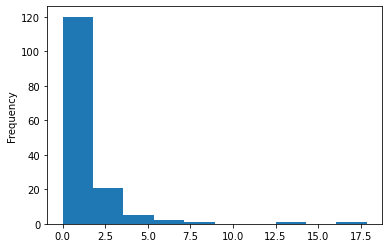

In [79]:
df_cities.en_degree_prop.plot.hist()

In [84]:
df_cities = df_cities[df_cities.city!='Gdynia']

<AxesSubplot:ylabel='Frequency'>

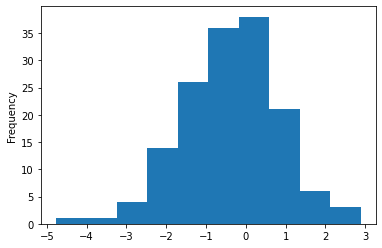

In [85]:
logged = np.log(df_cities.en_degree_prop)
logged.plot.hist(bins=10)